In [1]:
import warnings

# Ignore the specific UserWarning
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    message="FixedFormatter should only be used together with FixedLocator",
)


In [2]:
import sqlite3
import pandas as pd


In [3]:
import re


labels_dataset = pd.read_csv(
    "./Datasets/training_data_en.csv", usecols=["website", "tags"]
)

labels_dataset.to_csv("./Datasets/website_classification.csv", index=False)
labels_dataset.head()
labels_dataset.info()

# labels_dataset.drop("Unnamed: 0", axis=1, inplace=True)
# labels_dataset.drop("cleaned_website_text", axis=1, inplace=True)

# labels_dataset["website_url"] = labels_dataset["website_url"].map(
#     lambda x: re.match(r"https?://([A-Za-z.-]*)/?.*", x).group(1)
# )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36224 entries, 0 to 36223
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   website  36224 non-null  object
 1   tags     36224 non-null  object
dtypes: object(2)
memory usage: 566.1+ KB


In [4]:
conn = sqlite3.connect("/home/tirth/Downloads/places.sqlite")

full_data = pd.read_sql_query(
    """
SELECT 
    moz_places.url as url,
    moz_places.visit_count as visit_count,
    moz_places.frecency as url_frecency,
    moz_places.last_visit_date as last_visit_date,
    moz_origins.host as host,
    moz_origins.frecency as host_frecency
FROM moz_places
    JOIN moz_origins on moz_places.origin_id = moz_origins.id
    WHERE last_visit_date != 'NULL';
""",
    conn,
)

origins_data = pd.read_sql_query(
    """
SELECT
    moz_origins.host as host,
    moz_origins.frecency as host_frecency
FROM moz_origins;
""",
    conn,
)


In [5]:
from datetime import datetime

full_data["last_visit_date_readable"] = full_data["last_visit_date"].map(
    lambda x: datetime.fromtimestamp(x / 1000000)
)

full_data["last_visit_date_readable"].head()


0   2023-05-10 12:48:51.549000
1   2023-06-08 11:59:26.649115
2   2023-09-12 12:33:52.693589
3   2023-06-05 15:20:51.538450
4   2023-06-05 15:21:36.631130
Name: last_visit_date_readable, dtype: datetime64[ns]

In [6]:
full_data.head()


,url,visit_count,url_frecency,last_visit_date,host,host_frecency,last_visit_date_readable
0,https://spins.fedoraproject.org/,8,235,1683703131549000,spins.fedoraproject.org,2163,2023-05-10 12:48:51.549000
1,https://www.redhat.com/,1,20,1686205766649115,www.redhat.com,14741,2023-06-08 11:59:26.649115
2,https://www.wikipedia.org/,5,1614,1694502232693589,www.wikipedia.org,3947,2023-09-12 12:33:52.693589
3,https://www.mozilla.org/en-US/privacy/firefox/,2,20,1685958651538450,www.mozilla.org,222,2023-06-05 15:20:51.538450
4,https://addons.mozilla.org/en-US/firefox/searc...,1,20,1685958696631130,addons.mozilla.org,58507,2023-06-05 15:21:36.631130


In [7]:
full_data.describe()


,visit_count,url_frecency,last_visit_date,host_frecency,last_visit_date_readable
count,34399.000000,3.439900e+04,3.439900e+04,3.439900e+04,34399
mean,1.956220,1.898617e+02,1.687930e+15,1.321736e+06,2023-06-28 10:54:33.235860480
min,0.000000,-1.000000e+00,1.675771e+15,0.000000e+00,2023-02-07 17:33:53.624000
25%,1.000000,2.000000e+01,1.683805e+15,1.025000e+04,2023-05-11 16:59:35.782500096
50%,1.000000,2.000000e+01,1.687459e+15,4.841160e+05,2023-06-23 00:05:06.283846912
75%,1.000000,4.700000e+01,1.691762e+15,3.398461e+06,2023-08-11 19:17:15.114332416
max,1214.000000,1.274700e+06,1.696764e+15,3.398461e+06,2023-10-08 16:47:01.753256
std,10.694205,8.029006e+03,4.738305e+12,1.527706e+06,NaN


In [8]:
full_data.info()
# 34564
# 34399

## 34369


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34399 entries, 0 to 34398
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   url                       34399 non-null  object        
 1   visit_count               34399 non-null  int64         
 2   url_frecency              34399 non-null  int64         
 3   last_visit_date           34399 non-null  int64         
 4   host                      34399 non-null  object        
 5   host_frecency             34399 non-null  int64         
 6   last_visit_date_readable  34399 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.8+ MB


In [9]:
for i in full_data.columns:
    print(i, full_data[i].isna().sum())

# import csv
# full_data.to_csv("full_data.csv", quoting=csv.QUOTE_ALL)


url 0
visit_count 0
url_frecency 0
last_visit_date 0
host 0
host_frecency 0
last_visit_date_readable 0


In [10]:
origins_data.head()


,host,host_frecency
0,type=6&sort=14&maxResults=10,0
1,docs.fedoraproject.org,1438
2,fedoramagazine.org,360
3,getfedora.org,140
4,spins.fedoraproject.org,2163


In [11]:
origins_data.describe()


,host_frecency
count,2.530000e+03
mean,6.645901e+03
std,8.109907e+04
min,0.000000e+00
25%,9.000000e+01
50%,1.500000e+02
75%,1.027250e+03
max,3.398461e+06


In [12]:
origins_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host           2530 non-null   object
 1   host_frecency  2530 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 39.7+ KB


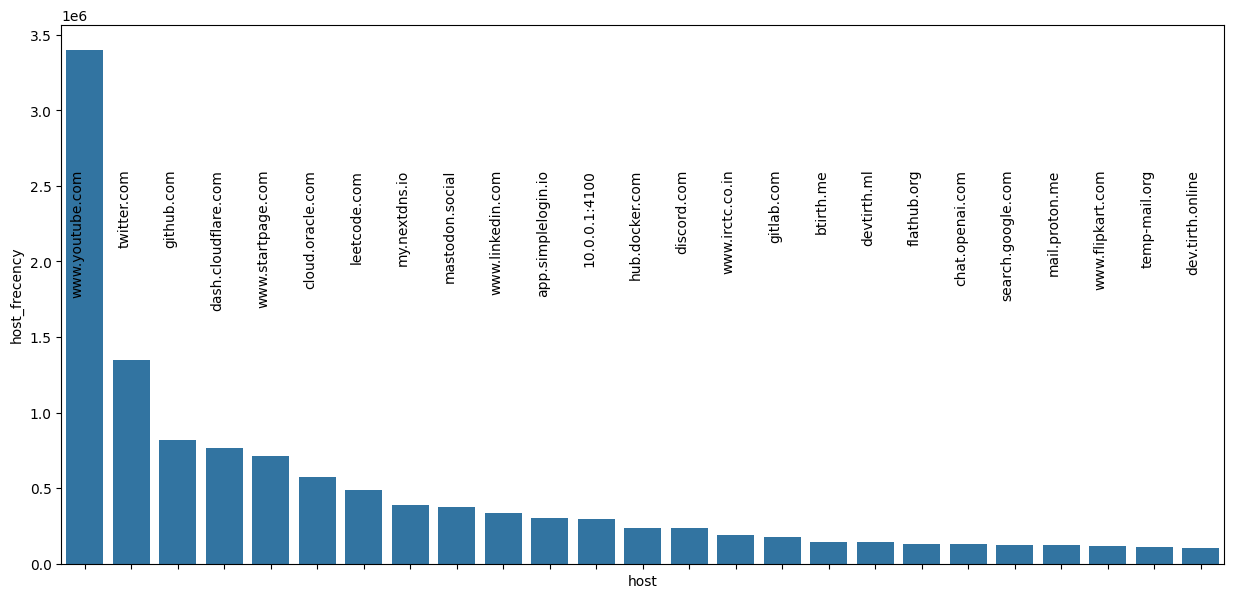

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns


plt.subplots(figsize=(15, 7))

ax = sns.barplot(
    x="host",
    y="host_frecency",
    data=origins_data.sort_values(by="host_frecency", ascending=False).head(25),
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    ha="right",
    y=0.75,
)

plt.show()


# origins_data.sort_values(by="host_frecency", ascending=False).head(30).plot.bar()


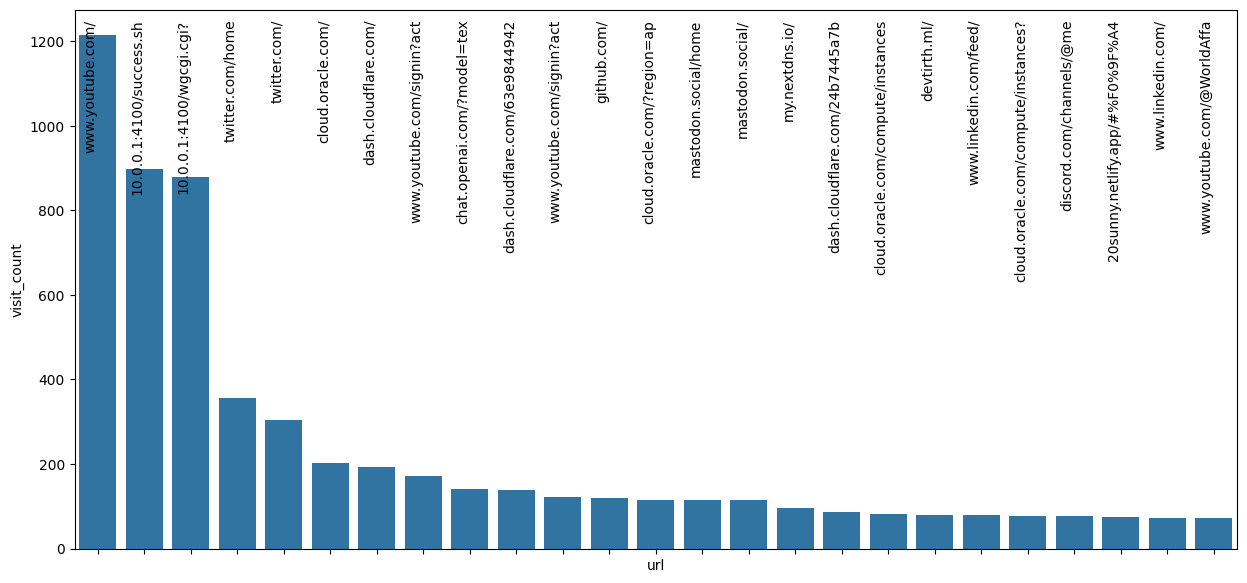

In [14]:
# lineplot for visit count
from matplotlib import pyplot as plt
import seaborn as sns
import re


plt.subplots(figsize=(15, 7))
full_data_sorted = full_data.sort_values(by="visit_count", ascending=False).head(25)

ax = sns.barplot(
    x="url",
    y="visit_count",
    data=full_data_sorted,
)

# print(full_data_sorted["url"])
labels = full_data_sorted["url"].map(
    lambda x: str(re.match(r"^\/?.*\/.{0,10}", str(x[8:])).group(0))
)
# print(labels)

# move the labels some units to the right
ax.set_xticklabels(labels, rotation=90, ha="right", y=1)

plt.show()


# origins_data.sort_values(by="host_frecency", ascending=False).head(30).plot.bar()


In [82]:
# x = datetime(2020, 1, 1).day
print(datetime.fromtimestamp(1675771433624000 / 1000000).strftime("%d-%m-%Y"))
# get rows where url_frecency is 0
# full_data[full_data["last_visit_date_readable"]].info()


full_data["visit_day"] = full_data["last_visit_date_readable"].dt.weekday.replace(
    {
        0: "Monday",
        1: "Tuesday",
        2: "Wednesday",
        3: "Thursday",
        4: "Friday",
        5: "Saturday",
        6: "Sunday",
    }
)


def TOD_str(x):
    # 5:00 - 12:00 : Morning
    # 12:00 - 16:00 : Afternoon
    # 16:00 - 21:00 : Evening
    # 21:00 - 5:00 : Night

    if 5 <= x <= 11:
        return "Morning"
    elif 11 < x <= 16:
        return "Afternoon"
    elif 16 < x <= 21:
        return "Evening"
    else:
        return "Night"


full_data["visit_TOD"] = full_data["last_visit_date_readable"].dt.hour.map(TOD_str)

full_data.head()


07-02-2023


,url,visit_count,url_frecency,last_visit_date,host,host_frecency,last_visit_date_readable,visit_day,visit_TOD
0,https://spins.fedoraproject.org/,8,235,1683703131549000,spins.fedoraproject.org,2163,2023-05-10 12:48:51.549000,Wednesday,Afternoon
1,https://www.redhat.com/,1,20,1686205766649115,www.redhat.com,14741,2023-06-08 11:59:26.649115,Thursday,Morning
2,https://www.wikipedia.org/,5,1614,1694502232693589,www.wikipedia.org,3947,2023-09-12 12:33:52.693589,Tuesday,Afternoon
3,https://www.mozilla.org/en-US/privacy/firefox/,2,20,1685958651538450,www.mozilla.org,222,2023-06-05 15:20:51.538450,Monday,Afternoon
4,https://addons.mozilla.org/en-US/firefox/searc...,1,20,1685958696631130,addons.mozilla.org,58507,2023-06-05 15:21:36.631130,Monday,Afternoon


In [42]:
full_data.info()

# get dataset with visit_TOD = morning
# full_data[full_data["visit_TOD"] == "Morning"].info()


# sns.heatmap(
#     data=full_data[
#         [
#             "visit_count",
#             "url_frecency",
#             "last_visit_date",
#             "host_frecency",
#             "last_visit_date_readable",
#             "visit_day",
#             "visit_TOD",
#         ]
#     ].corr(),
#     # cmap="YlGnBu",
#     square=True,
# )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34399 entries, 0 to 34398
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   url                       34399 non-null  object        
 1   visit_count               34399 non-null  int64         
 2   url_frecency              34399 non-null  int64         
 3   last_visit_date           34399 non-null  int64         
 4   host                      34399 non-null  object        
 5   host_frecency             34399 non-null  int64         
 6   last_visit_date_readable  34399 non-null  datetime64[ns]
 7   visit_day                 34399 non-null  int32         
 8   visit_TOD                 34399 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(4), object(2)
memory usage: 2.1+ MB


/home/tirth/College/Sem-5/FDS/FDS-Prac/venv/lib64/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


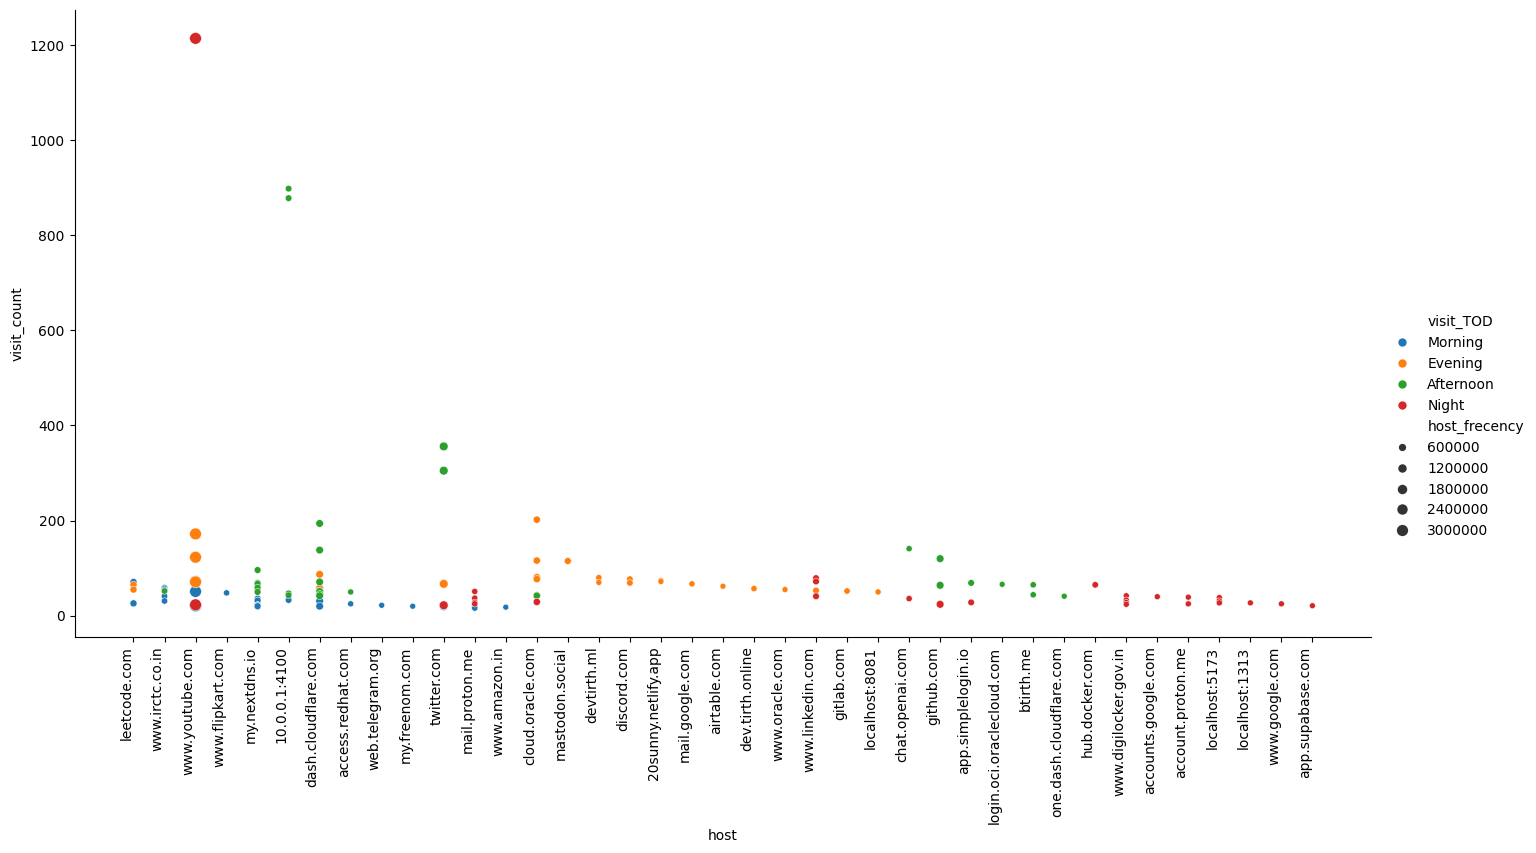

In [81]:
cols = [
    # "url"
    "visit_count"
    "url_frecency"
    "last_visit_date"
    "host"
    "host_frecency"
    "last_visit_date_readable"
    "visit_day"
    "visit_TOD"
]

df = pd.concat(
    [
        full_data[full_data["visit_TOD"] == i]
        .sort_values(by="visit_count", ascending=False)
        .drop("url", axis=1)
        # .filter(items=cols, axis=0)
        .head(30)
        for i in ["Morning", "Afternoon", "Evening", "Night"]
    ]
)

# print(df.head())

# ax = sns.relplot(
#     x="host",
#     y="host_frecency",
#     data=full_data[full_data["visit_TOD"] == "Morning"]
#     .sort_values(by="url_frecency", ascending=False)
#     .head(25),
#     hue="visit_TOD",
#     size="visit_count",
#     height=7,
#     aspect=2,
# )
ax = sns.relplot(
    x="host",
    y="visit_count",
    data=df,
    hue="visit_TOD",
    size="host_frecency",
    height=7,
    aspect=2,
)
ax.set_xticklabels(rotation=90, ha="right")

plt.show()


In [77]:
df.head()


,visit_count,url_frecency,last_visit_date,host,host_frecency,last_visit_date_readable,visit_day,visit_TOD
23364,71,119280,1696741920300468,leetcode.com,484116,2023-10-08 10:42:00.300468,Sunday,Morning
154,52,55770,1696656162223658,www.irctc.co.in,187242,2023-10-07 10:52:42.223658,Saturday,Morning
4093,48,21447,1691986757880975,www.flipkart.com,118466,2023-08-14 09:49:17.880975,Monday,Morning
29288,26,5746,1696741919988452,leetcode.com,484116,2023-10-08 10:41:59.988452,Sunday,Morning
16440,11,3609,1693632846592718,cryptpad.fr,13647,2023-09-02 11:04:06.592718,Saturday,Morning
